In [3]:
import os, sys
lib_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(lib_path)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from metric import MetricRecorder, MetricReader, plt
import matplotlib.patches as mpatches

In [5]:
mr = MetricReader(config_dir_path='../training/no_spearmint/simple.json')
m = MetricRecorder(config_dir_path='../training/no_spearmint/simple.json')

In [6]:
mr.get_job_metadata(job_id=8)

,_id,algorithm,dropouts,eta,eta_min,improvement_threshold,job_id,layers,lmbda,mini_batch_size,momentum,patience_increase,random_mode,training_data,validation_data,validation_frequency
0,56af724df2684a205e9e2c4b,rmsprop,"0.0, 0.0",0.02,None,0.995,8,"FC(25, 80)-FC(80, 1)",0,500,0.95,2,fully,3486240,3486240,20


/home/lho/Htw/bachelor/thesis-code/venv/local/lib/python2.7/site-packages/pandas/tools/plotting.py:3283: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn("When passing multiple axes, layout keyword is ignored", UserWarning)


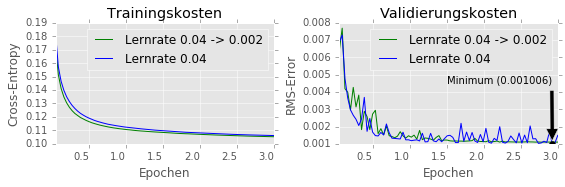

In [7]:
mr.compair_plot(job_ids=[18, 19], colors=['g', 'b'], titles=['Lernrate 0.04 -> 0.002', 
                                                             'Lernrate 0.04'])

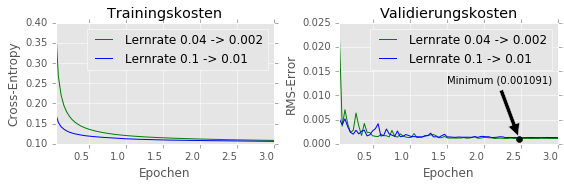

In [8]:
mr.compair_plot(job_ids=[21, 22], colors=['g', 'b'], titles=['Lernrate 0.04 -> 0.002', 
                                                             'Lernrate 0.1 -> 0.01'])

/home/lho/Htw/bachelor/thesis-code/venv/local/lib/python2.7/site-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


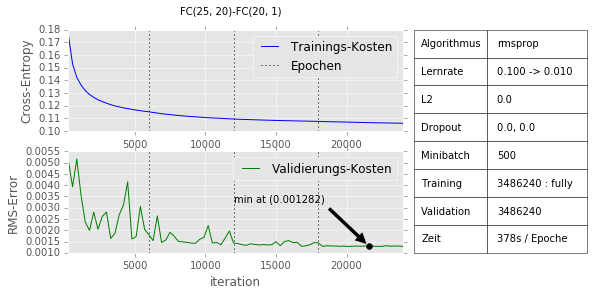

In [9]:
mr.plot(job_id=22)

In [253]:
mr.get_records(job_id=25)

,_id,cost,epoch,iteration,job_id,second,type,validation_accuracy
0,56aafd45f2684a550a14ef30,0.187975,0,150,25,11.824438,train,0.010661
1,56aafd48f2684a550a14ef31,0.152599,0,300,25,15.060680,train,0.003410
2,56aafd4bf2684a550a14ef32,0.139424,0,450,25,18.291961,train,0.003123
3,56aafd51f2684a550a14ef33,0.132484,0,600,25,24.161331,train,0.003241
4,56aafd54f2684a550a14ef34,0.128051,0,750,25,27.423067,train,0.002661
5,56aafd57f2684a550a14ef35,0.125032,0,900,25,30.665848,train,0.002433
6,56aafd5df2684a550a14ef36,0.122808,0,1050,25,36.393203,train,0.002436
7,56aafd61f2684a550a14ef37,0.120931,0,1200,25,39.805138,train,0.002554
8,56aafd64f2684a550a14ef38,0.119449,0,1350,25,43.075379,train,0.002600
9,56aafd67f2684a550a14ef39,0.118184,0,1500,25,46.330768,train,0.002148


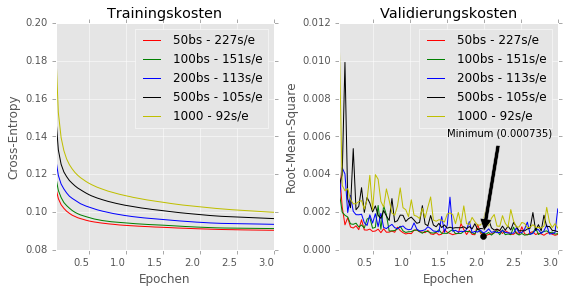

In [257]:
mr.compair_plot(job_ids=[21, 22, 23, 24, 25], titles=['50bs - 227s/e', '100bs - 151s/e', '200bs - 113s/e', 
                                                      '500bs - 105s/e' , '1000 - 92s/e'], colors=['r', 'g', 'b', 'k', 'y'])

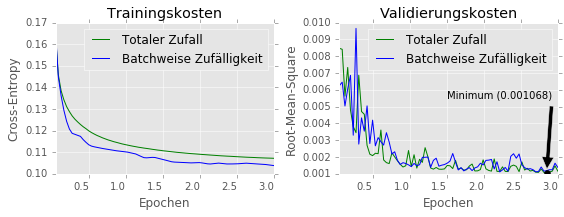

In [232]:
mr.compair_plot(job_ids=[8,9],titles=[u'Totaler Zufall', u'Batchweise Zufälligkeit'], colors=['g', 'b'])

In [74]:
mr.get_job_metadata(job_id=1_)

,_id,algorithm,dropouts,eta,improvement_threshold,job_id,layers,lmbda,mini_batch_size,momentum,patience_increase,training_data,validation_data,validation_frequency
0,56ab6e8cf2684aa71a4c74b6,rmsprop,"0.0, 0.0",0.02,0.995,1,"FC(25, 80)-FC(80, 1)",0,200,0.95,2,24902640,3557520,30


/home/lho/Htw/bachelor/thesis-code/venv/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


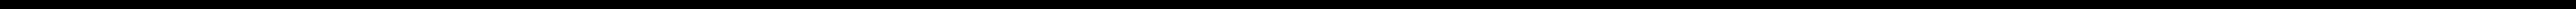

In [622]:
mr.plot(job_id=32)

In [182]:
mr.get_job_metadata(job_id=8)

,_id,algorithm,dropouts,eta,eta_min,improvement_threshold,job_id,layers,lmbda,mini_batch_size,momentum,patience_increase,random_mode,training_data,validation_data,validation_frequency
0,56af724df2684a205e9e2c4b,rmsprop,"0.0, 0.0",0.02,None,0.995,8,"FC(25, 80)-FC(80, 1)",0,500,0.95,2,fully,3486240,3486240,20


In [66]:
#mr.plot_epoches(job_id=15, title='Lernphase Minibatch 1000')

In [173]:
mr.get_job_metadata(job_id=2)

,_id,algorithm,dropouts,eta,improvement_threshold,job_id,layers,lmbda,mini_batch_size,momentum,patience_increase,training_data,validation_data,validation_frequency
0,56a8f562f2684a5ae307551b,rmsprop,"0.0, 0.0, 0.0",0.01,0.995,2,"dAe[rlu, 0.300](25, 80)-dAe[rlu, 0.300](80, 50...",0,200,0,2,28460160,7115040,5


0.0025000000000000001

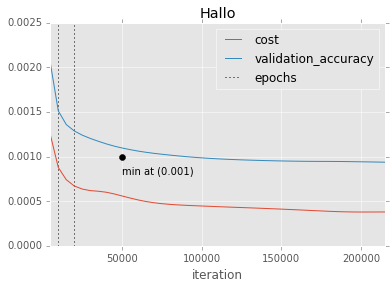

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(xy=(50000, 0.001), marker='o', color="r", linestyle="None", label="test")
records[['cost', 'validation_accuracy', 'iteration']].plot(x='iteration', 
                                                           y=['cost', 'validation_accuracy'],
                                                           title="Hallo",
                                                           sharey=True, ax=ax)
ax.vlines(x=[10000,20000], ymin=[0],ymax=[0.0025], label='epochs', linestyle='dotted')
#ax.annotate('min', xy=(50000, 0.001), xytext=(50000+30000, 0.0016), arrowprops=dict(facecolor='black', shrink=0.003))
ax.annotate('min at (0.001)', xy=(50000, 0.001), xytext=(50000, 0.0008), arrowprops=None)
ax.plot(50000, 0.001, 'o', color="k")
ax.legend()
ax.get_ylim()[1]


In [98]:
records['iteration'].values

array([  4999,   9999,  14999,  19999,  24999,  29999,  34999,  39999,
        44999,  49999,  54999,  59999,  64999,  69999,  74999,  79999,
        84999,  89999,  94999,  99999, 104999, 109999, 114999, 119999,
       124999, 129999, 134999, 139999, 144999, 149999, 154999, 159999,
       164999, 169999, 174999, 179999, 184999, 189999, 194999, 199999,
       204999, 209999, 214999])

[]

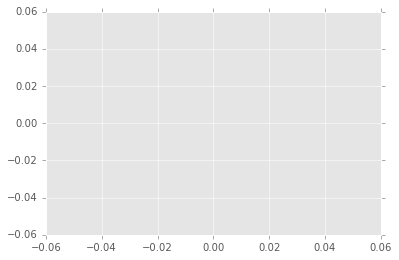

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x=records['iteration'].values, y=records['cost'].values)

In [ ]:
ax = fig.add_subplot

In [36]:
metric.metrics.name

u'db.meta'

In [178]:
metric.metrics.distinct('job_id')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [173]:
cur.next()

StopIteration: 

In [91]:
cur2.next()

{u'_id': ObjectId('569e75eff2684a2a9369a51b'),
 u'constants': {u'X_dirpath': u'../../../data/train/*',
  u'batchsize': 5000000,
  u'epochs': 100,
  u'improvement_threshold': 0.995,
  u'limit': 30,
  u'lmbda': 0.0,
  u'mini_batch_size': 500,
  u'patience': 20000,
  u'patience_increase': 2,
  u'validation_frequency': 5000,
  u'y_dirpath': u'../../../data/train_cleaned/'},
 u'experiment_name': u'metric-test'}